# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st

# Import API key
from config import api_key_OWM

 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key_OWM}&q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# Lists for holding data
lat_lngs = []
cities = []
temp = []
humid = []
cloud = []
wind_speed = []
city_name = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
lat = []
long = []
city_count = 1
total_cities = len(cities)
country = []

# Build partial query URL
query_url = f"{url}appid={api_key_OWM}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    print(f"City request number: {city_count} of {total_cities} | {city}")
    
    try:
        city_count = city_count+1
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
    except (KeyError, IndexError):
        print(f"Missing data for city number:{city_count}")
        pass
        
    
      
print("Data retrieval finalised")
print("------------------------------")


City request number: 1 of 626 | tubruq
Missing data for city number:2
City request number: 2 of 626 | albany
City request number: 3 of 626 | ilulissat
City request number: 4 of 626 | castro
City request number: 5 of 626 | georgetown
City request number: 6 of 626 | punta arenas
City request number: 7 of 626 | lagoa
City request number: 8 of 626 | bandarbeyla
City request number: 9 of 626 | hermanus
City request number: 10 of 626 | bredasdorp
City request number: 11 of 626 | garmsar
City request number: 12 of 626 | leningradskiy
City request number: 13 of 626 | atuona
City request number: 14 of 626 | cape town
City request number: 15 of 626 | tyukhtet
City request number: 16 of 626 | najran
City request number: 17 of 626 | lufilufi
City request number: 18 of 626 | belyy yar
City request number: 19 of 626 | busselton
City request number: 20 of 626 | faanui
City request number: 21 of 626 | puerto ayora
City request number: 22 of 626 | katsuura
City request number: 23 of 626 | kapaa
City re

City request number: 179 of 626 | lata
City request number: 180 of 626 | guanica
City request number: 181 of 626 | yellowknife
City request number: 182 of 626 | kawalu
City request number: 183 of 626 | lindas
City request number: 184 of 626 | new norfolk
City request number: 185 of 626 | butaritari
City request number: 186 of 626 | beyneu
City request number: 187 of 626 | norman wells
City request number: 188 of 626 | vestmannaeyjar
City request number: 189 of 626 | narok
City request number: 190 of 626 | surab
City request number: 191 of 626 | karratha
City request number: 192 of 626 | itarema
City request number: 193 of 626 | iracoubo
City request number: 194 of 626 | lebu
City request number: 195 of 626 | souillac
City request number: 196 of 626 | kingsville
City request number: 197 of 626 | salinopolis
City request number: 198 of 626 | sterling
City request number: 199 of 626 | tadine
City request number: 200 of 626 | ashland
City request number: 201 of 626 | cayenne
City request n

City request number: 358 of 626 | pevek
City request number: 359 of 626 | barbar
Missing data for city number:360
City request number: 360 of 626 | east wenatchee bench
City request number: 361 of 626 | ozgon
Missing data for city number:362
City request number: 362 of 626 | nabire
City request number: 363 of 626 | aykhal
City request number: 364 of 626 | kabinda
City request number: 365 of 626 | nouadhibou
City request number: 366 of 626 | marawi
City request number: 367 of 626 | dondo
City request number: 368 of 626 | balykshi
Missing data for city number:369
City request number: 369 of 626 | skovorodino
City request number: 370 of 626 | te anau
City request number: 371 of 626 | dudinka
City request number: 372 of 626 | tuatapere
City request number: 373 of 626 | denpasar
City request number: 374 of 626 | mogadishu
City request number: 375 of 626 | husavik
City request number: 376 of 626 | puerto escondido
City request number: 377 of 626 | lolua
Missing data for city number:378
City 

City request number: 535 of 626 | tecoanapa
City request number: 536 of 626 | colac
City request number: 537 of 626 | salta
City request number: 538 of 626 | lyuban
City request number: 539 of 626 | carrigaline
City request number: 540 of 626 | suntar
City request number: 541 of 626 | cap malheureux
City request number: 542 of 626 | plonsk
City request number: 543 of 626 | hobyo
City request number: 544 of 626 | porto novo
City request number: 545 of 626 | kattivakkam
City request number: 546 of 626 | yefira
Missing data for city number:547
City request number: 547 of 626 | sao felix do xingu
City request number: 548 of 626 | lar
City request number: 549 of 626 | bayir
City request number: 550 of 626 | havelock
City request number: 551 of 626 | labuhan
City request number: 552 of 626 | konskie
City request number: 553 of 626 | aswan
City request number: 554 of 626 | ostrovnoy
City request number: 555 of 626 | port lincoln
City request number: 556 of 626 | tromso
City request number: 55

In [6]:
#create dict for all this data to go into so we can make DF for scatter plot
weather_dict = {"city": city_name,"Country":country,"lat": lat,"long":long,"temp": temp,"humidity":humid,"cloudiness":cloud,"wind speed":wind_speed}
len(lat)

573

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#display dataframe 
city_data = pd.DataFrame(weather_dict)
city_data.head()

,city,Country,lat,long,temp,humidity,cloudiness,wind speed
0,Albany,US,42.60,-73.97,290.69,90,88,3.43
1,Ilulissat,GL,69.22,-51.10,283.15,57,20,2.10
2,Castro,BR,-24.79,-50.01,286.31,91,68,2.19
3,George Town,MY,5.41,100.34,301.37,88,20,1.00
4,Punta Arenas,CL,-53.15,-70.92,268.92,92,68,1.50


In [28]:
#export data to csv
city_data.to_csv("city_data.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#convert Kelvin to Farenheit --this is allgood to use in final 
faren = (city_data["temp"]- 273.15) * 9/5 + 32
faren

0      63.572
1      50.000
2      55.688
3      82.796
4      24.386
        ...  
568    63.554
569    76.460
570    71.492
571    65.642
572    79.934
Name: temp, Length: 573, dtype: float64

In [10]:
#add the kelvin conversion into the dict and make new dataframe again
weather_dict_rev = {"City": city_name,"Country":country,"lat": lat,"long":long,"temp": faren,"humidity":humid,"cloudiness":cloud,"wind speed":wind_speed}
weather_df = pd.DataFrame(weather_dict_rev)
weather_df

,City,Country,lat,long,temp,humidity,cloudiness,wind speed
0,Albany,US,42.60,-73.97,63.572,90,88,3.43
1,Ilulissat,GL,69.22,-51.10,50.000,57,20,2.10
2,Castro,BR,-24.79,-50.01,55.688,91,68,2.19
3,George Town,MY,5.41,100.34,82.796,88,20,1.00
4,Punta Arenas,CL,-53.15,-70.92,24.386,92,68,1.50
...,...,...,...,...,...,...,...,...
568,Norco,US,33.93,-117.55,63.554,72,1,1.42
569,Khvatovka,RU,52.35,46.56,76.460,42,51,4.04
570,Guatire,VE,10.48,-66.54,71.492,82,69,1.91
571,Kholuy,RU,56.58,41.87,65.642,81,85,3.30


In [11]:
weather_data = weather_df.loc[weather_df["humidity"]<100]
weather_data

,City,Country,lat,long,temp,humidity,cloudiness,wind speed
0,Albany,US,42.60,-73.97,63.572,90,88,3.43
1,Ilulissat,GL,69.22,-51.10,50.000,57,20,2.10
2,Castro,BR,-24.79,-50.01,55.688,91,68,2.19
3,George Town,MY,5.41,100.34,82.796,88,20,1.00
4,Punta Arenas,CL,-53.15,-70.92,24.386,92,68,1.50
...,...,...,...,...,...,...,...,...
568,Norco,US,33.93,-117.55,63.554,72,1,1.42
569,Khvatovka,RU,52.35,46.56,76.460,42,51,4.04
570,Guatire,VE,10.48,-66.54,71.492,82,69,1.91
571,Kholuy,RU,56.58,41.87,65.642,81,85,3.30


# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#I believe this has been achieved with the overwriting of dataframe in weather_data

In [29]:
# Extract relevant fields from the data frame
weather_data.to_csv("weather_data.csv",index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

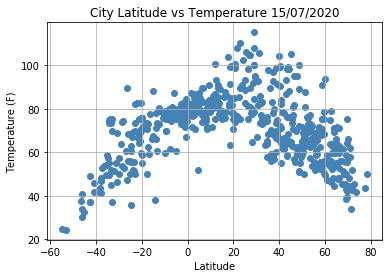

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o",color="steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature 15/07/2020")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureVsLatitudeWorldCities.png")

# Show plot
plt.show()

Observations for latitude vs temperature
A noticeable trend in the scatter plot is that the southern hemisphere cities do not get above 100degrees farenheit, and the northern hemisphere is experiencing higher temperatures from around latitude 20° to 40° and further awar from the equator is much cooler and the coldest temperature is in the southern hemisphere

## Latitude vs. Humidity Plot

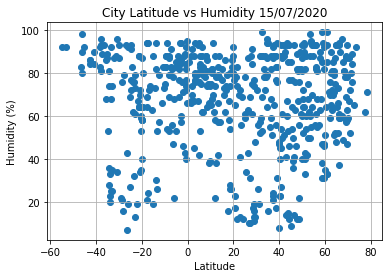

In [30]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity 15/07/2020")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLatitudeWorldCities.png")

# Show plot
plt.show()

Observations for latitude vs humidity
As we can see in the scatter plot above, humidity is fairly similar across all range of latitudes. The term humidity generally refers to the amount of this water vapor in the atmosphere and can be caused by the ground water evaporating on a hot day or the colder climate where it has rained recently there will be more water vapor in the air. We need to take into consideration that the type of humidity had not been defined in the collected data. 

## Latitude vs. Cloudiness Plot

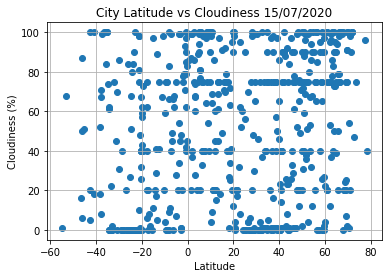

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness 15/07/2020")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessVsLatitudeWorldCities.png")

# Show plot
plt.show()

Observations for latitude vs cloudiness
As we can see in the scatter plot above, cloudiness is fairly similar across all range of latitudes. We expect this because scientifically clouds are forming all over the world from multiple types of reactions. 

## Latitude vs. Wind Speed Plot

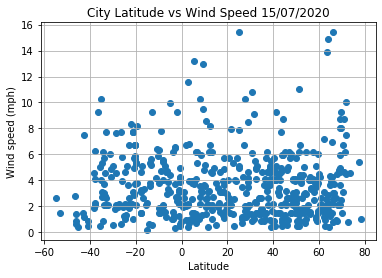

In [32]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed 15/07/2020")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedVsLatitudeWorldCities.png")

# Show plot
plt.show()

Observations for latitude vs wind speed
As we can see in the scatter plot above,the southern hemisphere latitudes maximum wind speed for the day was just over 10mph however in the nothern hemisphere there is higher wind speeds past 14mph 

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data["lat"]>=0]
southern_df = weather_data.loc[weather_data["lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

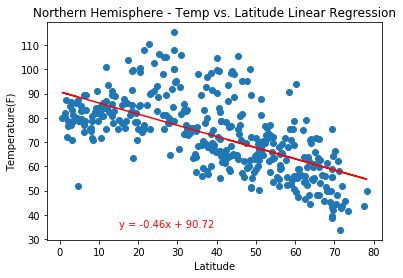

In [33]:
y = northern_df["temp"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.text(15,35, line_annotation, fontsize = 10, color="red");

plt.savefig("Northern Hemisphere - Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

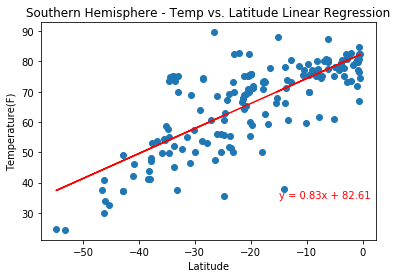

In [34]:
y = southern_df["temp"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.text(-15,35, line_annotation, fontsize = 10, color="red");

plt.savefig("Southern Hemisphere - Temp vs. Latitude Linear Regression.png")

Observation for Temp vs. Latitude Linear Regression
The Northern is a negative correlation and Southern Hemisphere is a positive correlation, which we would expect. As the latitude climbs from negative numbers and closer to 0 so does the temperature because the equator is the warmer part of the planet as it is closer to the sun.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

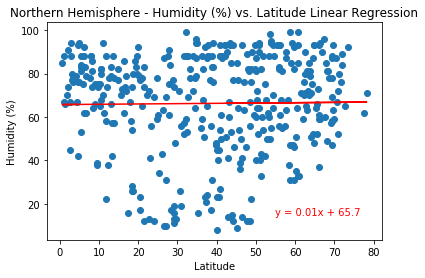

In [35]:
y = northern_df["humidity"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.text(55,15, line_annotation, fontsize = 10, color="red");

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

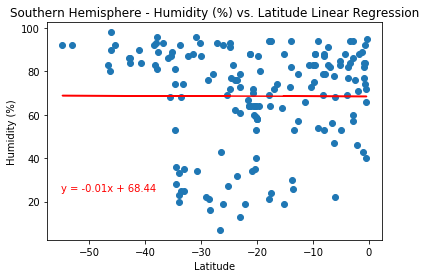

In [36]:
y = southern_df["humidity"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.text(-55,25, line_annotation, fontsize = 10, color="red");

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

Observation for Humidity vs. Latitude Linear Regression
As we can see in the scatter plots above, Southern Hemisphere has a very weak positive correaltion and Northern hemisphere has a very weak positive correlation, we see only higher humidity in the -50° to -40° latitudes ranging from around 80% and higher.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

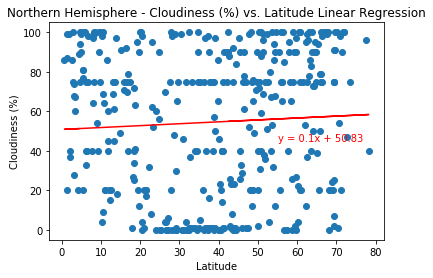

In [37]:
y = northern_df["cloudiness"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(55,45, line_annotation, fontsize = 10, color="red");

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

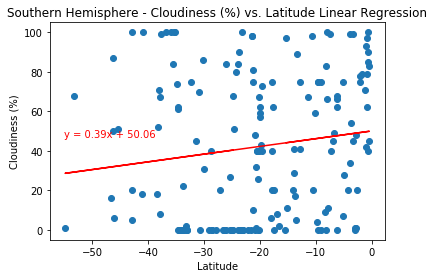

In [38]:
y = southern_df["cloudiness"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(-55,47, line_annotation, fontsize = 10, color="red");

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

Observation for cloudiness vs. Latitude Linear Regression
The southern hemisphere is showing a slight positive correlation and the northern hemisphere also. I would suggest this is  because scientifically clouds are forming all over the world from multiple types of reactions.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

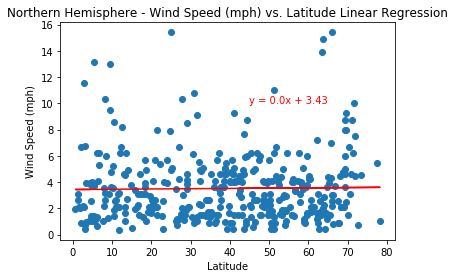

In [39]:
y = northern_df["wind speed"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.text(45,10, line_annotation, fontsize = 10, color="red");

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

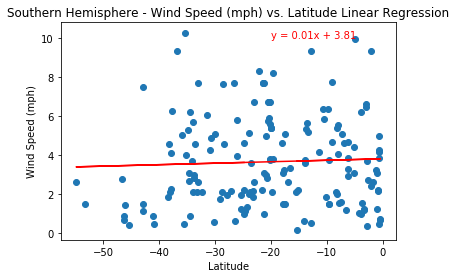

In [40]:
y = southern_df["wind speed"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.text(-20,10, line_annotation, fontsize = 10, color="red");

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

Observation for wind speed vs. Latitude Linear Regression
The Northern hempisphere has higher windspeeds than the Southern hemisphere which we found out from the original scatter plot, there appears to be only a slight positive correlation for both northern and southern hemispheres suggesting the latitude does not have much to do with wind speed. 